In [1]:
%matplotlib inline


# Blend transparency with color in 2-D images


Blend transparency with color to highlight parts of data with imshow.

A common use for :func:`matplotlib.pyplot.imshow` is to plot a 2-D statistical
map. While ``imshow`` makes it easy to visualize a 2-D matrix as an image,
it doesn't easily let you add transparency to the output. For example, one can
plot a statistic (such as a t-statistic) and color the transparency of
each pixel according to its p-value. This example demonstrates how you can
achieve this effect using :class:`matplotlib.colors.Normalize`. Note that it is
not possible to directly pass alpha values to :func:`matplotlib.pyplot.imshow`.

First we will generate some data, in this case, we'll create two 2-D "blobs"
in a 2-D grid. One blob will be positive, and the other negative.


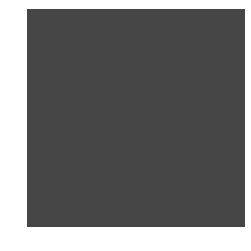

In [31]:
# sphinx_gallery_thumbnail_number = 3
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize


def normal_pdf(x, mean, var):
    return np.exp(-(x - mean)**2 / (2*var))


# Generate the space in which the blobs will live
xmin, xmax, ymin, ymax = (0, 100, 0, 100)
n_bins = 100
xx = np.linspace(xmin, xmax, n_bins)
yy = np.linspace(ymin, ymax, n_bins)

# Generate the blobs. The range of the values is roughly -.0002 to .0002
means_high = [20, 50]
means_low = [50, 60]
var = [150, 200]

gauss_x_high = normal_pdf(xx, means_high[0], var[0])
gauss_y_high = normal_pdf(yy, means_high[1], var[0])

gauss_x_low = normal_pdf(xx, means_low[0], var[1])
gauss_y_low = normal_pdf(yy, means_low[1], var[1])

weights_high = np.array(np.meshgrid(gauss_x_high, gauss_y_high)).prod(0)
weights_low = -1 * np.array(np.meshgrid(gauss_x_low, gauss_y_low)).prod(0)
weights = weights_high + weights_low

# We'll also create a grey background into which the pixels will fade
greys = np.full((*weights.shape, 3), 70, dtype=np.uint8)

# print(greys)

# First we'll plot these blobs using only ``imshow``.
vmax = np.abs(weights).max()
vmin = -vmax
cmap = plt.cm.RdYlBu

fig, ax = plt.subplots()
ax.imshow(greys)
# ax.imshow(weights, extent=(xmin, xmax, ymin, ymax), cmap=cmap)
ax.set_axis_off()

Blending in transparency
========================

The simplest way to include transparency when plotting data with
:func:`matplotlib.pyplot.imshow` is to convert the 2-D data array to a
3-D image array of rgba values. This can be done with
:class:`matplotlib.colors.Normalize`. For example, we'll create a gradient
moving from left to right below.



(100, 100)
(100, 100)
(100, 100, 4)


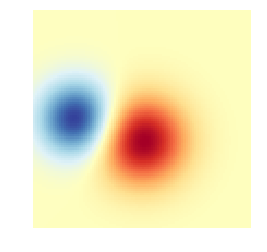

In [35]:
# Create an alpha channel of linearly increasing values moving to the right.
alphas = np.ones(weights.shape)
alphas[:, 30:] = np.linspace(1, 0, 70)
print(weights.shape)
print(alphas.shape)

# Normalize the colors b/w 0 and 1, we'll then pass an MxNx4 array to imshow
colors = Normalize(vmin, vmax, clip=True)(weights)
colors = cmap(colors)
print(colors.shape)

# Now set the alpha channel to the one we created above
# colors[..., -1] = alphas

# Create the figure and image
# Note that the absolute values may be slightly different
fig, ax = plt.subplots()
ax.imshow(greys)
ax.imshow(colors, extent=(xmin, xmax, ymin, ymax))
ax.set_axis_off()

Using transparency to highlight values with high amplitude
==========================================================

Finally, we'll recreate the same plot, but this time we'll use transparency
to highlight the extreme values in the data. This is often used to highlight
data points with smaller p-values. We'll also add in contour lines to
highlight the image values.



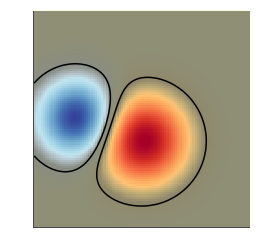

In [28]:
# Create an alpha channel based on weight values
# Any value whose absolute value is > .0001 will have zero transparency
alphas = Normalize(0, .3, clip=True)(np.abs(weights))
alphas = np.clip(alphas, .4, 1)  # alpha value clipped at the bottom at .4

# Normalize the colors b/w 0 and 1, we'll then pass an MxNx4 array to imshow
colors = Normalize(vmin, vmax)(weights)
colors = cmap(colors)

# Now set the alpha channel to the one we created above
colors[..., -1] = alphas

# Create the figure and image
# Note that the absolute values may be slightly different
fig, ax = plt.subplots()
ax.imshow(greys)
ax.imshow(colors, extent=(xmin, xmax, ymin, ymax))

# Add contour lines to further highlight different levels.
ax.contour(weights[::-1], levels=[-.1, .1], colors='k', linestyles='-')
ax.set_axis_off()
plt.show()

ax.contour(weights[::-1], levels=[-.0001, .0001], colors='k', linestyles='-')
ax.set_axis_off()
plt.show()

------------

References
""""""""""

The use of the following functions, methods and classes is shown
in this example:



In [ ]:
import matplotlib
matplotlib.axes.Axes.imshow
matplotlib.pyplot.imshow
matplotlib.axes.Axes.contour
matplotlib.pyplot.contour
matplotlib.colors.Normalize
matplotlib.axes.Axes.set_axis_off